In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [5]:
cancer= load_breast_cancer()

In [6]:
df=pd.DataFrame(cancer.data, columns=cancer.feature_names )
df["Dianosis"]= cancer.target

In [7]:
df.skew()

mean radius                0.942380
mean texture               0.650450
mean perimeter             0.990650
mean area                  1.645732
mean smoothness            0.456324
mean compactness           1.190123
mean concavity             1.401180
mean concave points        1.171180
mean symmetry              0.725609
mean fractal dimension     1.304489
radius error               3.088612
texture error              1.646444
perimeter error            3.443615
area error                 5.447186
smoothness error           2.314450
compactness error          1.902221
concavity error            5.110463
concave points error       1.444678
symmetry error             2.195133
fractal dimension error    3.923969
worst radius               1.103115
worst texture              0.498321
worst perimeter            1.128164
worst area                 1.859373
worst smoothness           0.415426
worst compactness          1.473555
worst concavity            1.150237
worst concave points       0

In [8]:
log_features = [
    'mean area', 'mean compactness', 'mean concavity', 'mean concave points',
    'mean fractal dimension', 'radius error', 'perimeter error', 'area error',
    'smoothness error', 'compactness error', 'concavity error', 'concave points error',
    'symmetry error', 'fractal dimension error', 'worst area', 'worst compactness',
    'worst symmetry', 'worst fractal dimension'
]

df[log_features] = df[log_features].apply(np.log1p)

In [9]:
df.skew()

mean radius                0.942380
mean texture               0.650450
mean perimeter             0.990650
mean area                  0.287328
mean smoothness            0.456324
mean compactness           1.043195
mean concavity             1.206982
mean concave points        1.083180
mean symmetry              0.725609
mean fractal dimension     1.272294
radius error               1.713417
texture error              1.646444
perimeter error            1.025375
area error                 0.847298
smoothness error           2.283394
compactness error          1.816278
concavity error            4.231738
concave points error       1.399869
symmetry error             2.135874
fractal dimension error    3.874373
worst radius               1.103115
worst texture              0.498321
worst perimeter            1.128164
worst area                 0.457614
worst smoothness           0.415426
worst compactness          1.048729
worst concavity            1.150237
worst concave points       0

In [10]:
X=df.drop(columns=["Dianosis"])
y=df["Dianosis"]

In [11]:
scaler=StandardScaler()
X=scaler.fit_transform(X)
X=pd.DataFrame(X,columns=cancer.feature_names)

In [12]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [13]:
lda=LinearDiscriminantAnalysis()
lda.fit(X_train,y_train)

LinearDiscriminantAnalysis()

In [19]:
y_pred=lda.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf=confusion_matrix(y_test, y_pred)

In [28]:
print("using LDA")
print("accuracy: ", acc)
print("precision_score: ", prec)
print("recall: ", rec)
print("f1: ", f1)
print("confusion_matrix: ", conf)

using LDA
accuracy:  0.9736842105263158
precision_score:  0.9594594594594594
recall:  1.0
f1:  0.9859154929577465
confusion_matrix:  [[42  1]
 [ 1 70]]


In [23]:
from sklearn.linear_model import SGDClassifier
# Train SGD Classifier
sgd = SGDClassifier(loss='log_loss', max_iter=1000, tol=1e-3, random_state=42)
sgd.fit(X_train, y_train)

SGDClassifier(loss='log_loss', random_state=42)


SGD Classifier Results:
Accuracy: 0.9825
Precision: 0.9859
Recall: 0.9859
F1-Score: 0.9859
confusion_matrix:  [[42  1]
 [ 1 70]]


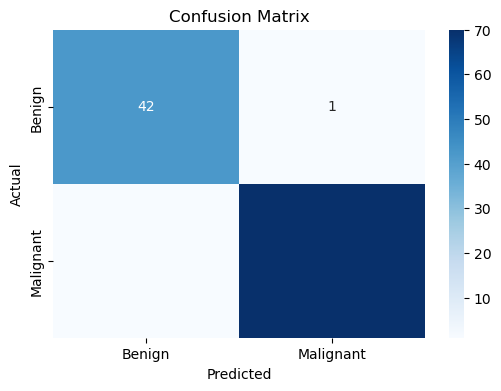

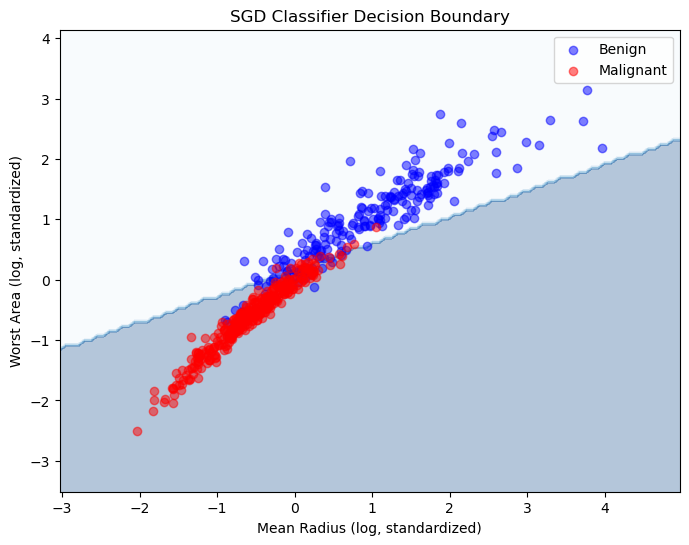

In [27]:
# Predict
y_pred = sgd.predict(X_test)

# Evaluate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf=confusion_matrix(y_test, y_pred)
print("\nSGD Classifier Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("confusion_matrix: ", conf)


# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Visualize decision boundary (using two key features for simplicity)
X_2d = X[['mean radius', 'worst area']].values
sgd_2d = SGDClassifier(loss='log_loss', max_iter=1000, tol=1e-3, random_state=42)
sgd_2d.fit(X_2d, y)
xx, yy = np.meshgrid(np.linspace(X_2d[:, 0].min()-1, X_2d[:, 0].max()+1, 100),
                     np.linspace(X_2d[:, 1].min()-1, X_2d[:, 1].max()+1, 100))
Z = sgd_2d.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap='Blues', alpha=0.3)
plt.scatter(X_2d[y == 0, 0], X_2d[y == 0, 1], color='blue', alpha=0.5, label='Benign')
plt.scatter(X_2d[y == 1, 0], X_2d[y == 1, 1], color='red', alpha=0.5, label='Malignant')
plt.xlabel('Mean Radius (log, standardized)')
plt.ylabel('Worst Area (log, standardized)')
plt.title('SGD Classifier Decision Boundary')
plt.legend()
plt.show()